## ciao sono marco

## ciao sono marco 2

In [ ]:
import matplotlib.pyplot as plt
import fastf1
import fastf1.plotting


In [ ]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress



# Specifica l'anno, il circuito e la sessione
year = 2023
circuit = 'Monza'  # Sostituisci con il circuito di tuo interesse
session_type = 'R'  # 'R' per la gara, 'Q' per le qualifiche

# Carica la sessione
session = ff1.get_session(year, circuit, session_type)
session.load()

# Ottieni i dati meteo
weather_data = session.weather_data

# Ottieni i dati dei giri (laps)
laps = session.laps

# Unisci i dati dei giri con i dati meteo in base al tempo
merged_data = laps.merge(weather_data, how='left', left_on='Time', right_on='Time')

# Filtra i dati per rimuovere valori NaN (se presenti)
merged_data = merged_data.dropna(subset=['TrackTemp', 'LapTime'])

# Converti i tempi di giro in secondi
merged_data['LapTime_seconds'] = merged_data['LapTime'].dt.total_seconds()

# Plot: Tempi di giro vs Temperatura del tracciato
plt.figure(figsize=(12, 8))

# Aggiungi una linea di tendenza (regressione lineare)
slope, intercept, r_value, p_value, std_err = linregress(merged_data['TrackTemp'], merged_data['LapTime_seconds'])
plt.plot(merged_data['TrackTemp'], intercept + slope * merged_data['TrackTemp'], color='red', label=f'Linea di tendenza (R²={r_value**2:.2f})')

# Scatter plot colorato per pilota
sns.scatterplot(data=merged_data, x='TrackTemp', y='LapTime_seconds', hue='Driver', palette='viridis', alpha=0.7)

plt.title(f'Tempi di giro vs Temperatura del tracciato - {circuit} {year}')
plt.xlabel('Temperatura del tracciato (°C)')
plt.ylabel('Tempo di giro (secondi)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda esterna
plt.grid()
plt.tight_layout()
plt.show()

# Stampa la correlazione
print(f"Correlazione tra temperatura del tracciato e tempi di giro: {r_value:.2f}")

In [ ]:
## come impatta la temperatura del tracciato sulle prestazioni, perchè il grafico non presenta dati?



import fastf1 as ff1
import matplotlib.pyplot as plt


# Specifica l'anno, il circuito e la sessione
year = 2023
circuit = 'Monza'  # Sostituisci con il circuito di tuo interesse
session_type = 'R'  # 'R' per la gara, 'Q' per le qualifiche

# Carica la sessione
session = ff1.get_session(year, circuit, session_type)
session.load()

# Ottieni i dati meteo
weather_data = session.weather_data

# Ottieni i dati dei giri (laps)
laps = session.laps

# Unisci i dati dei giri con i dati meteo in base al tempo
merged_data = laps.merge(weather_data, how='left', left_on='Time', right_on='Time')

# Filtra i dati per rimuovere valori NaN (se presenti)
merged_data = merged_data.dropna(subset=['TrackTemp', 'LapTime'])

# Plot: Tempi di giro vs Temperatura del tracciato
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['TrackTemp'], merged_data['LapTime'].dt.total_seconds(), alpha=0.5)
plt.title(f'Tempi di giro vs Temperatura del tracciato - {circuit} {year}')
plt.xlabel('Temperatura del tracciato (°C)')
plt.ylabel('Tempo di giro (secondi)')
plt.grid()
plt.show()

In [ ]:
## impatto della temperatura sui tempi sul giro di tutti tracciati 2023


import fastf1 as ff1
import matplotlib.pyplot as plt
import pandas as pd


# Anno di interesse
year = 2023

# Ottieni la lista di tutti i circuiti della stagione
events = ff1.get_event_schedule(year)

# Filtra solo gli eventi di Formula 1 (escludendo altre serie)
events = events[events['EventFormat'] == 'conventional']

# Lista per memorizzare i risultati
all_data = []

# Loop su ogni circuito
for _, event in events.iterrows():
    try:
        # Carica la sessione di gara
        session = ff1.get_session(year, event['EventName'], 'R')  # 'R' per la gara
        session.load()

        # Ottieni i dati meteo e dei giri
        weather_data = session.weather_data
        laps = session.laps

        # Unisci i dati dei giri con i dati meteo
        merged_data = laps.merge(weather_data, how='left', left_on='Time', right_on='Time')
        merged_data = merged_data.dropna(subset=['TrackTemp', 'LapTime'])  # Rimuovi NaN

        # Aggiungi il nome del circuito ai dati
        merged_data['Circuit'] = event['EventName']

        # Aggiungi i dati alla lista
        all_data.append(merged_data)

        print(f"Dati caricati per {event['EventName']}")

    except Exception as e:
        print(f"Errore durante il caricamento dei dati per {event['EventName']}: {e}")

# Combina tutti i dati in un unico DataFrame
all_data = pd.concat(all_data)

# Plot: Tempi di giro vs Temperatura del tracciato per tutti i circuiti
plt.figure(figsize=(12, 8))
for circuit, data in all_data.groupby('Circuit'):
    plt.scatter(data['TrackTemp'], data['LapTime'].dt.total_seconds(), label=circuit, alpha=0.5)

plt.title('Tempi di giro vs Temperatura del tracciato - Stagione 2023')
plt.xlabel('Temperatura del tracciato (°C)')
plt.ylabel('Tempo di giro (secondi)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda esterna
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
## correlazione tra la temperatura del tracciato e il degrado delle gomme

import fastf1 as ff1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Abilita la cache
ff1.Cache.enable_cache('path/to/cache')  # Sostituisci con il percorso della tua cache

# Specifica l'anno, il circuito e la sessione
year = 2023
circuit = 'Monza'  # Sostituisci con il circuito di tuo interesse
session_type = 'R'  # 'R' per la gara

# Carica la sessione
session = ff1.get_session(year, circuit, session_type)
session.load()

# Ottieni i dati meteo
weather_data = session.weather_data

# Ottieni i dati dei giri (laps)
laps = session.laps

# Unisci i dati dei giri con i dati meteo in base al tempo
merged_data = laps.merge(weather_data, how='left', left_on='Time', right_on='Time')

# Filtra i dati per rimuovere valori NaN (se presenti)
merged_data = merged_data.dropna(subset=['TrackTemp', 'LapTime', 'Compound'])

# Converti i tempi di giro in secondi
merged_data['LapTime_seconds'] = merged_data['LapTime'].dt.total_seconds()

# Identifica le stint
merged_data['Stint'] = (merged_data['Compound'] != merged_data['Compound'].shift(1)).cumsum()

# Lista per memorizzare i risultati
stint_results = []

# Analizza ogni stint
for stint, stint_data in merged_data.groupby('Stint'):
    if len(stint_data) < 2:  # Ignora stint con meno di 2 giri
        continue

    # Calcola il degrado delle gomme (aumento del tempo di giro rispetto al primo giro)
    stint_data['LapTimeIncrease'] = stint_data['LapTime_seconds'] - stint_data['LapTime_seconds'].iloc[0]

    # Calcola la temperatura media del tracciato durante la stint
    avg_track_temp = stint_data['TrackTemp'].mean()

    # Calcola il degrado medio delle gomme (aumento del tempo di giro per giro)
    degradation_rate = stint_data['LapTimeIncrease'].iloc[-1] / len(stint_data)

    # Aggiungi i risultati alla lista
    stint_results.append({
        'Stint': stint,
        'AvgTrackTemp': avg_track_temp,
        'DegradationRate': degradation_rate,
        'Driver': stint_data['Driver'].iloc[0],  # Pilota della stint
        'Compound': stint_data['Compound'].iloc[0]  # Tipo di gomma
    })

# Converti i risultati in un DataFrame
stint_results = pd.DataFrame(stint_results)

# Plot: Degrado delle gomme vs Temperatura del tracciato
plt.figure(figsize=(12, 8))
for compound, compound_data in stint_results.groupby('Compound'):
    plt.scatter(compound_data['AvgTrackTemp'], compound_data['DegradationRate'], label=compound, alpha=0.7)

# Aggiungi una linea di tendenza (regressione lineare)
slope, intercept, r_value, p_value, std_err = linregress(stint_results['AvgTrackTemp'], stint_results['DegradationRate'])
plt.plot(stint_results['AvgTrackTemp'], intercept + slope * stint_results['AvgTrackTemp'], color='red', label=f'Linea di tendenza (R²={r_value**2:.2f})')

plt.title(f'Degrado delle gomme vs Temperatura del tracciato - {circuit} {year}')
plt.xlabel('Temperatura media del tracciato (°C)')
plt.ylabel('Degrado delle gomme (secondi per giro)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda esterna
plt.grid()
plt.tight_layout()
plt.show()

# Stampa la correlazione
print(f"Correlazione tra temperatura del tracciato e degrado delle gomme: {r_value:.2f}")

req         WARNING 	DEFAULT CACHE ENABLED! (939.59 MB) C:\Users\calin\AppData\Local\Temp\fastf1
events      WARNING 	Correcting user input 'Pre-Season Testing' to 'British Grand Prix'
core           INFO 	Loading data for British Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 dri

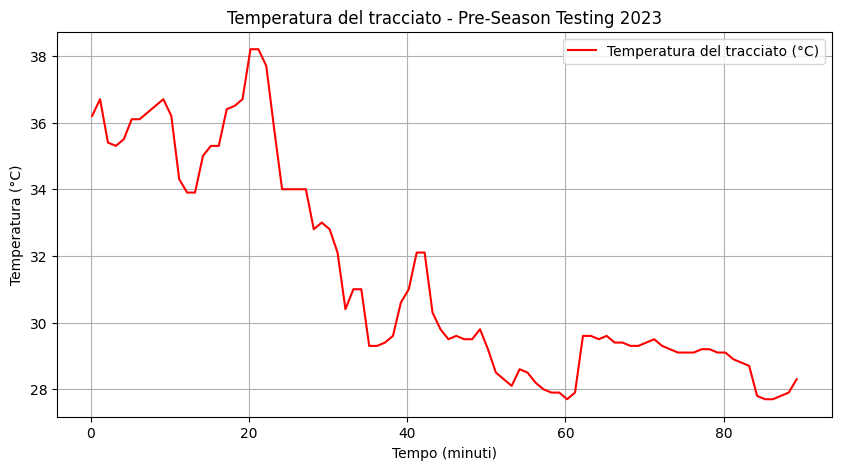

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']


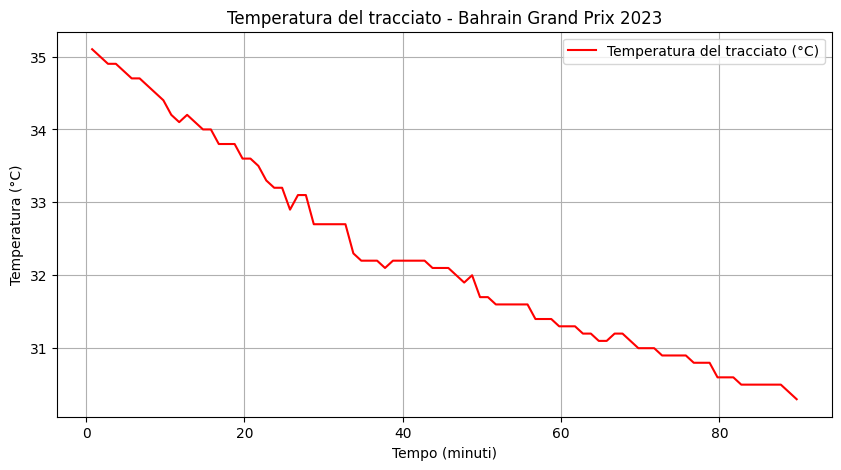

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '14', '63', '44', '55', '16', '31', '10', '20', '22', '27', '24', '21', '81', '2', '4', '77', '23', '18']


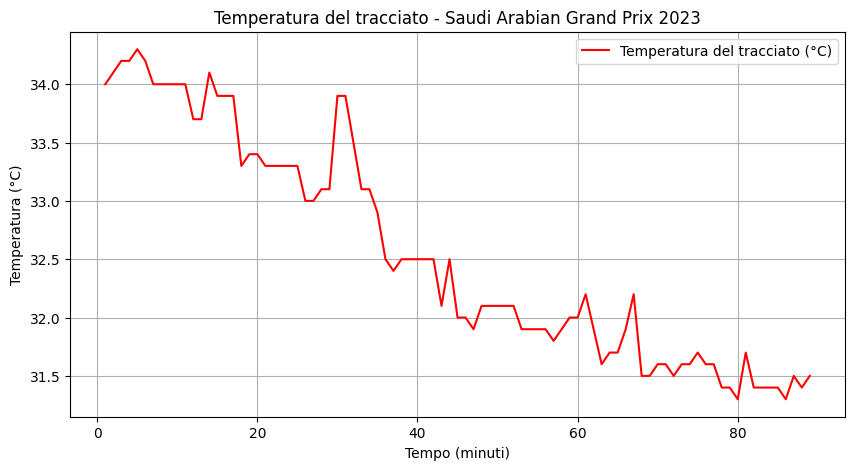

core           INFO 	Loading data for Australian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '14', '18', '11', '4', '27', '81', '24', '22', '77', '55', '10', '31', '21', '2', '20', '63', '23', '16']


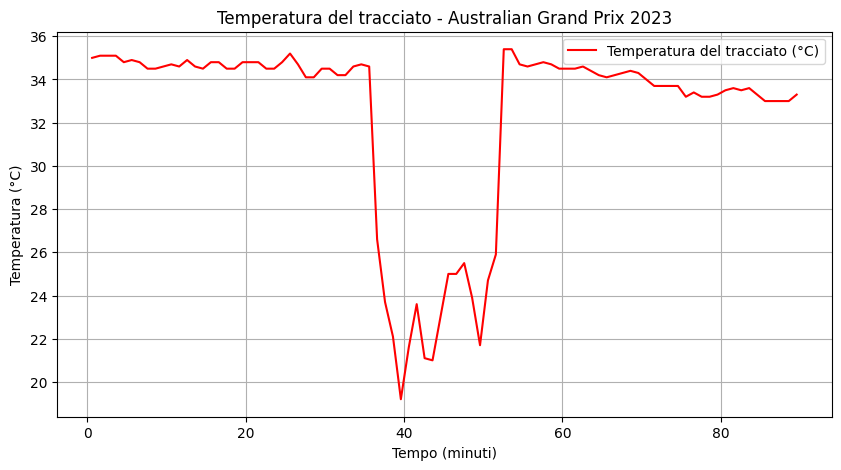

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '16', '14', '55', '44', '18', '63', '4', '22', '81', '23', '20', '10', '31', '2', '27', '77', '24', '21']


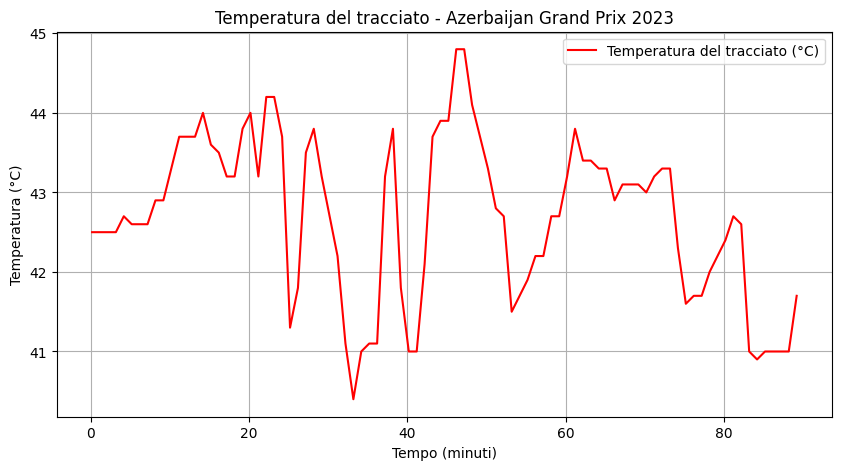

core           INFO 	Loading data for Miami Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '63', '55', '44', '16', '10', '31', '20', '22', '18', '77', '23', '27', '24', '4', '21', '81', '2']


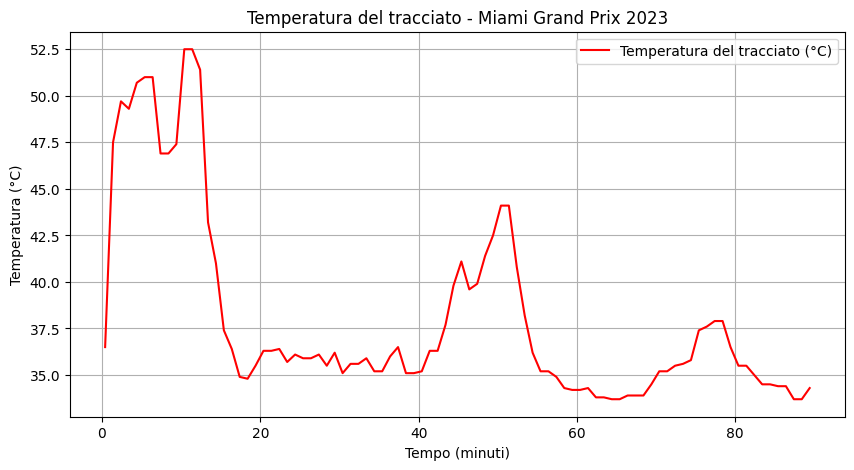

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...


KeyboardInterrupt: 

In [7]:
#Anno da analizzare
year = 2023

#Ottieni la lista degli eventi per l'anno specificato
events = fastf1.get_event_schedule(year)

#Itera su ogni evento
for _, event in events.iterrows():
    try:
        # Ottieni la sessione di gara (Race) per l'evento
        session = fastf1.get_session(year, event['EventName'], 'R')
        session.load()  # Carica i dati della sessione

        # Ottieni i dati meteo
        weather_data = session.weather_data

        # Converti la colonna 'Time' in minuti
        weather_data['Time'] = weather_data['Time'].dt.total_seconds() / 60

        # Filtra i dati per considerare solo i minuti di gara (es. 90 minuti)
        race_duration = 90
        weather_data = weather_data[weather_data['Time'] <= race_duration]

        # Crea il grafico
        plt.figure(figsize=(10, 5))
        plt.plot(weather_data['Time'], weather_data['TrackTemp'], label='Temperatura del tracciato (°C)', color='red')
        plt.title(f"Temperatura del tracciato - {event['EventName']} {year}")
        plt.xlabel('Tempo (minuti)')
        plt.ylabel('Temperatura (°C)')
        plt.legend()
        plt.grid()
        plt.show()

    except Exception as e:
        print(f"Errore durante l'elaborazione dell'evento {event['EventName']}: {e}")